In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_47417_R')

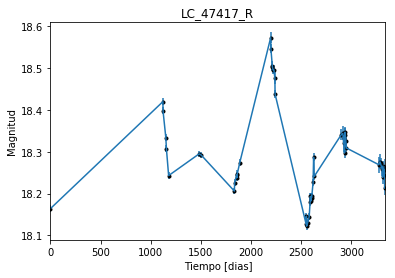

In [2]:
data = np.genfromtxt('LC_47417_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_47417_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

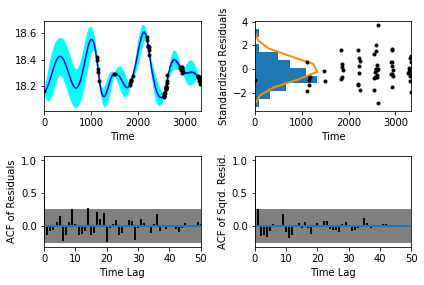

In [5]:
sample.assess_fit()

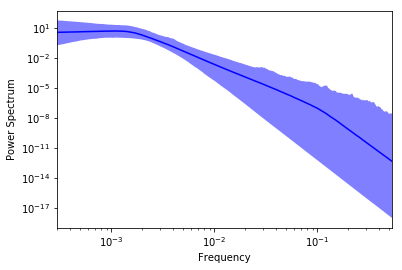

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_47417_R')

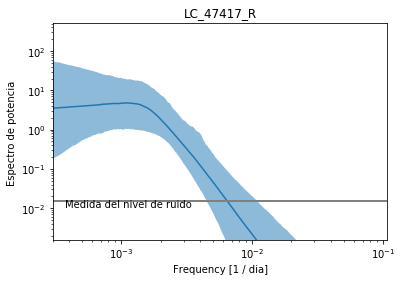

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_47417_R')

Text(0.5,1,'Prediccion , valor esperado LC_47417_R')

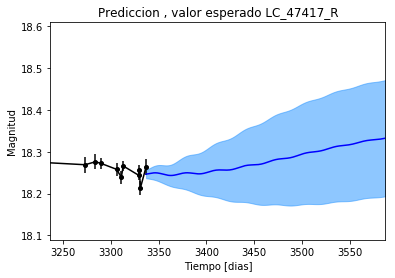

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_47417_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_47417_R')

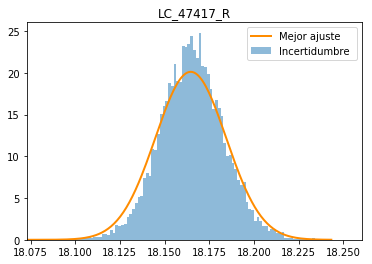

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_47417_R')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_R')

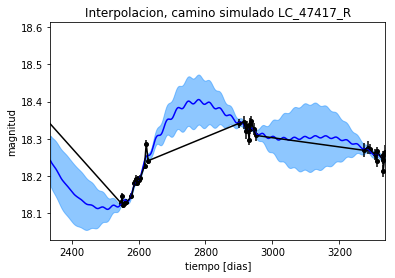

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_R')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_R')

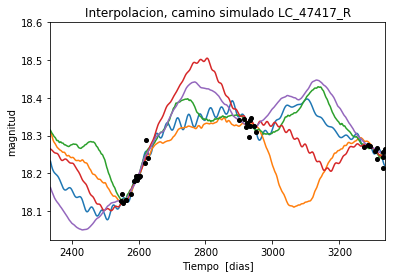

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 391.697005658
Median: 0.00242820009149
Standard deviation: 0.122787797643
68% credibility interval: [ 0.00053062  0.04799466]
95% credibility interval: [  3.26357935e-04   4.46873675e-01]
99% credibility interval: [  3.04398437e-04   8.52842912e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 426.29129378
Median: 0.00156911082246
Standard deviation: 0.0743658797837
68% credibility interval: [ 0.00049934  0.02359005]
95% credibility interval: [ 0.00032364  0.23671152]
99% credibility interval: [  3.04271475e-04   5.47053021e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 302.272730136
Median: 0.00126962998493
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1377.99170769
Median: 153.95836488
Standard deviation: 2.13191211091
68% credibility interval: [ 151.60146209  155.67302725]
95% credibility interval: [ 148.66397941  156.80811674]
99% credibility interval: [ 146.60224846  157.80236152]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 309.069895791
Median: 0.216962699948
Standard deviation: 1.78237035648
68% credibility interval: [ 0.02584871  2.34885601]
95% credibility interval: [ 0.01171301  6.52013787]
99% credibility interval: [ 0.00901822  8.31703995]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 702.002320656
Median: 0.146364516477
Standard deviation: 8.16755820406
68% credibility interval: [  3.78274279e-03   5.68706866e+00]
95% credibility interval: [  4.5

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1041.83173819
Median: 1.218105307e-49
Standard deviation: 1.62183549213e+70
68% credibility interval: [  1.81316481e-116   2.99348428e+005]
95% credibility interval: [  4.31894454e-282   3.94942768e+031]
99% credibility interval: [  6.24988737e-301   2.06189571e+056]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2815.71407911
Median: 18.2966361333
Standard deviation: 0.0590128301486
68% credibility interval: [ 18.25344444  18.33833549]
95% credibility interval: [ 18.17952258  18.41206189]
99% credibility interval: [ 18.07447968  18.50610196]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 530.859612406
Median: 0.00838969659001
Standard deviation: 0.238074826623
68% credibility interval: [ 0.00063437  0.3296785 ]
95% credibility interval: [ 0.          0.88924323]
99% credibility interval: [ 0.          1.03400384]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 530.859612406
Median: 0.00838969659001
Standard deviation: 0.238074826623
68% credibility interval: [ 0.00063437  0.3296785 ]
95% credibility interval: [ 0.          0.88924323]
99% credibility interval: [ 0.          1.03400384]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 213.86996608
Median: 0.000773708709951
Standard deviation: 0.0007894

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1377.99170769
Median: 153.95836488
Standard deviation: 2.13191211091
68% credibility interval: [ 151.60146209  155.67302725]
95% credibility interval: [ 148.66397941  156.80811674]
99% credibility interval: [ 146.60224846  157.80236152]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2051.31915774
Median: 0.0214452850299
Standard deviation: 0.0328056149867
68% credibility interval: [ 0.01279348  0.03992378]
95% credibility interval: [ 0.00765674  0.0977725 ]
99% credibility interval: [ 0.00588829  0.21488989]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1281.12425245
Median: 1.40152476579
Standard deviation: 0.214147434906
68% credibility interval: [ 1.20110392  1.63269318]
95% credibility interval: [ 1.02636662  1.85569285]
99% credibility interval: [ 0.86832107  1.95388658]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 559.42081126
Median: 2.65960378559e-05
Standard deviation: 0.00260768408993
68% credibility interval: [  3.17081717e-09   1.14286204e-03]
95% credibility interval: [  3.02807016e-37   7.23349412e-03]
99% credibility interval: [  1.97222907e-62   1.48945420e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 391.697005658
Median: (-0.0152568311377-1.46832654971j)
Standard deviation: 1.68310182201
68% credibility interval: [-0.30155937-0.24821232j -0.00333396-0.00433035j]
95% credibility interval: [ -2.80779011e+00-4.38117769j  -2.05056739e-03-0.60119668j]
99% credibility interval: [ -5.35857005e+00+0.j          -1.91259179e-03-0.64366837j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 426.29129378
Median: (-0.00985901406504+0.00661609106713j)
Standard deviation: 1.56714667262
68% credibility interval: [-0.14822067+2.42807844j -0.00313745+0.02142142j]
95% credibility interval: [-1.48730236+2.77068642j -0.00203346+0.00855472j]
99% credibility interval: [ -3.43723551e+00+4.04771378j  -1.91179406e-03+0.j        ]
Posterior s